# Analytical Task <a class='tocSkip'>

The table contains sample data from declarative surveys on jobs and employment for a specific group of people. The data is anonymous and covers current and expected incomes as well as commuting preferences. The data is not perfect and contains a bit of noise.

**Your task is to analyze the data and find the answers to three following questions:**

1. What is the distribution of the expected net income in relation to the current net income (charts + conclusions)?

2. What is the correlation between the desire to earn more and the possibility to commute longer (further away from home).

3. What is the key factor that determines the tendency to move closer to the work place (what is the most relevant factor influencing the will to move home closer work)?


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Feature importance seaerch libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Statistical tests
from scipy import stats

In [101]:
# Loading data
df_raw = pd.read_excel('data/dataset.xlsx')

In [102]:
# Quick look at data
df_raw.head(3)

,id,Are you looking for a job?,Q13-C22 - Do you work currently? - Answer,How far do you live from current or previous work - less than 5 km,How far are you able to commute - less than 5 km,How far do you live from current or previous work - 5 -10 km,How far are you able to commute - less than 5 - 10 km,How far do you live from current or previous work - 11 - 20 km,How far are you able to commute - less than 11 - 20 km,How far do you live from current or previous work - 21 - 50 km,...,What is your current or previous monthly net salary - more than 6000 EUR,How much would you like to get monthly - more than 6000 EUR,What is your current or previous monthly net salary - refuse to answer,How much would you like to get monthly - refuse to answer,Have you ever worked before?,Are you keen on moving closer to your work place?,D1# City size,D2# Gender,D3# Age,D4# Education
0,81,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,no,yes,village,male,18 - 24 years,secondary
1,82,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,200k - 500k inhabitants,female,25 - 30 years,higher
2,83,yes,yes,NaN,NaN,current job,sought-after job,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,more than 500k inhabitants,female,18 - 24 years,vocational


In [ ]:
# Sorting rows by 'id'
df_raw.sort_values('id', ascending=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
df_raw.head(3)

In [ ]:
# Setting proper column order, because they are mixed
living_distance_ix = df_raw.columns[df_raw.columns.str.contains('live')]
# df_raw[living_distance_ix].head(2)

commute_ix = df_raw.columns[df_raw.columns.str.contains('commute')]
# df_raw[commute_ix].head(2)

salary_ix = df_raw.columns[df_raw.columns.str.contains('salary')]
# df_raw[salary_ix].head(2)

get_ix = df_raw.columns[df_raw.columns.str.contains('get')]
# df_raw[get_ix].head(2)

# df_raw.iloc[:,:3].head(2)
# df_raw.iloc[:,-6:].head(2)

In [ ]:
df_raw.shape

In [ ]:
# New sorted dataframe
df = pd.concat([df_raw.iloc[:,:3],
               df_raw[living_distance_ix],
               df_raw[commute_ix],
               df_raw[salary_ix],
               df_raw[get_ix],
               df_raw.iloc[:,-6:]], axis=1)

In [ ]:
df.shape

In [ ]:
df.head(2)

Checking missing data distibution

In [ ]:
df_isnull = pd.DataFrame(df.isnull().sum())
df_isnull.reset_index(inplace=True)
df_isnull.columns = ['question','count']

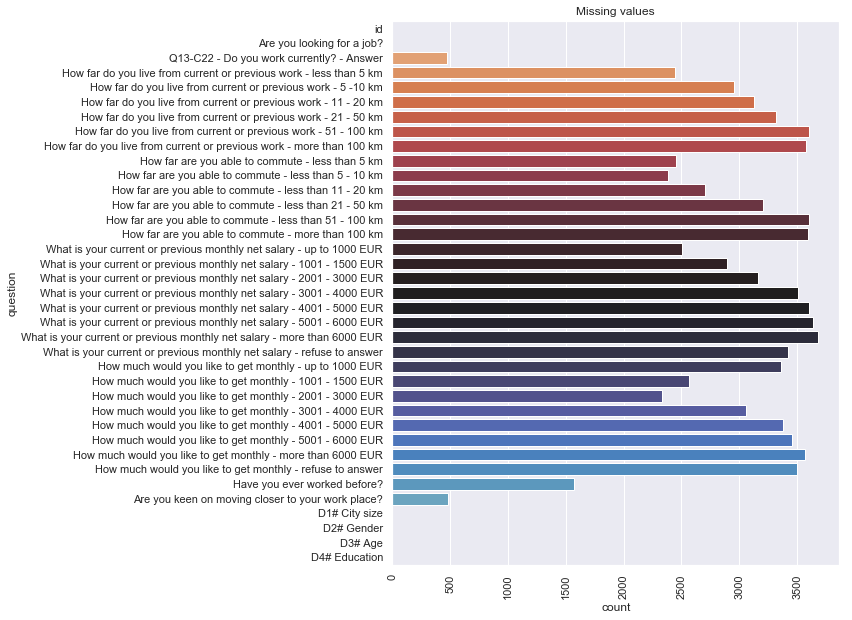

In [110]:
plt.figure(figsize=(8, 10))
sns.barplot(y='question', x='count', data=df_isnull, palette='icefire_r')
plt.xticks(rotation=90)
plt.title('Missing values');

In [111]:
# First-glance statistics
df.describe(exclude='number')

,Are you looking for a job?,Q13-C22 - Do you work currently? - Answer,How far do you live from current or previous work - less than 5 km,How far do you live from current or previous work - 5 -10 km,How far do you live from current or previous work - 11 - 20 km,How far do you live from current or previous work - 21 - 50 km,How far do you live from current or previous work - 51 - 100 km,How far do you live from current or previous work - more than 100 km,How far are you able to commute - less than 5 km,How far are you able to commute - less than 5 - 10 km,...,How much would you like to get monthly - 4001 - 5000 EUR,How much would you like to get monthly - 5001 - 6000 EUR,How much would you like to get monthly - more than 6000 EUR,How much would you like to get monthly - refuse to answer,Have you ever worked before?,Are you keen on moving closer to your work place?,D1# City size,D2# Gender,D3# Age,D4# Education
count,3692,3220,1248,739,568,371,91,112,1242,1307,...,310,238,124,195,2119,3212,3692,3692,3692,3692
unique,2,2,2,2,2,2,2,2,1,1,...,1,1,1,1,2,2,7,2,6,4
top,yes,no,previous job,previous job,previous job,previous job,current job,previous job,sought-after job,sought-after job,...,sought-after job,sought-after job,sought-after job,sought-after job,yes,no,village,male,18 - 24 years,secondary
freq,3212,2118,848,488,348,218,51,78,1242,1307,...,310,238,124,195,1972,2280,869,1860,1186,1866


# What is the distribution of the expected net income in relation to the current net income (charts + conclusions)?

<br><br><br>
**Conclusions:**<br><br>

* Most of the survey participants earn up to 1000 EUR per month. 
* Most of survey participants would like to earn between 2000 and 3000 EUR, but the runners-up got little bit lower expectations of 1000 to 1500 EUR. 
* Very few responders earn and would like to earn more than 6000 EUR.
<br><br>
* Overall tendency seems to be that the higher income the lower needs to earn more and the distribution starts to spread onto both higher but also lower expectations. Once they achieve top income levels (5000+ EUR) the tendency is to stay on this level but also looking for earning less. Whether this is due to overworking or some other circumstances is further to be analyzed. 

**Note:**
After differentiate the results with `gender` variable it turns out that the overall current income distribution in skewed. There is three times more women earning up to 1000 EUR than men in survey group, and going higher in salaries there is a raise of seven times more men earning 4000-5000 EUR than women. At the 3000+ EUR level there is significant drop in amount of female representatives so this could affect income expectiations results.


<br><br><br><br>

### Checking not-answered and multi-answered questions and ploting overall results

In [112]:
# Helper function

def valid_answers_plot(group, plot_title):
    
    
    # Dropping useless observations because I cannot be sure of them
    group_inc = group[group.notnull().sum(axis=1) == 1]
    
    # Printing information about invalid entries
    print('Number of not-answered and multi-answered questions: {} of {}. \n \
           Ploting only valid {} entries'\
          .format(group[group.notnull().sum(axis=1) != 1].shape[0], group.shape[0],
                  group_inc.describe().T['count'].sum())) 

    # Ploting overall result
    plt.figure(figsize=(12,2))
    sns.barplot(x='count', y='index', data=group_inc.describe().T.reset_index(), palette='Set2')
    labels = group_inc.describe().T.reset_index()['index'].str.split('-', 1, expand=True)[1].values
    plt.yticks(rotation=0, ticks= range(len(labels)), labels=labels)
    plt.ylabel('Range')
    plt.xlabel('Frequency')
    plt.title(plot_title)
    plt.show()

In [113]:
curr_double_answers_check = df.loc[:,'What is your current or previous monthly net salary - up to 1000 EUR':'What is your current or previous monthly net salary - refuse to answer']

Number of not-answered and multi-answered questions: 761 of 3692. 
            Ploting only valid 2931 entries


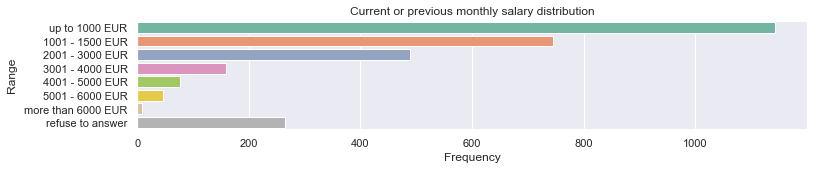

Sample invalid data


,What is your current or previous monthly net salary - up to 1000 EUR,What is your current or previous monthly net salary - 1001 - 1500 EUR,What is your current or previous monthly net salary - 2001 - 3000 EUR,What is your current or previous monthly net salary - 3001 - 4000 EUR,What is your current or previous monthly net salary - 4001 - 5000 EUR,What is your current or previous monthly net salary - 5001 - 6000 EUR,What is your current or previous monthly net salary - more than 6000 EUR,What is your current or previous monthly net salary - refuse to answer
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# Current or previous monthly net salary question
valid_answers_plot(curr_double_answers_check, 'Current or previous monthly salary distribution')
print('Sample invalid data')
curr_double_answers_check[curr_double_answers_check.notnull().sum(axis=1) != 1].head(2)

<br><br>
Most of the survey participants earn up to 1000 EUR per month.
<br><br><br>

In [115]:
exp_double_answers_check = df.loc[:,'How much would you like to get monthly - up to 1000 EUR':'How much would you like to get monthly - refuse to answer']

Number of not-answered and multi-answered questions: 1497 of 3692. 
            Ploting only valid 2195 entries


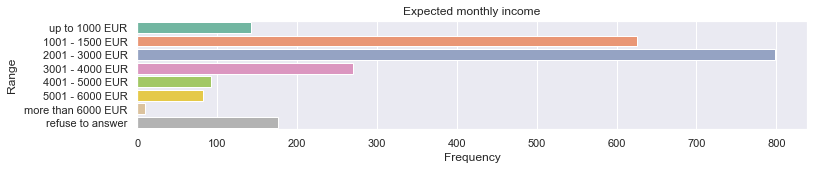

Sample invalid data


,How much would you like to get monthly - up to 1000 EUR,How much would you like to get monthly - 1001 - 1500 EUR,How much would you like to get monthly - 2001 - 3000 EUR,How much would you like to get monthly - 3001 - 4000 EUR,How much would you like to get monthly - 4001 - 5000 EUR,How much would you like to get monthly - 5001 - 6000 EUR,How much would you like to get monthly - more than 6000 EUR,How much would you like to get monthly - refuse to answer
0,NaN,sought-after job,sought-after job,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# Expected net monthly income
valid_answers_plot(exp_double_answers_check, 'Expected monthly income')
print('Sample invalid data')
exp_double_answers_check[exp_double_answers_check.notnull().sum(axis=1) != 1].head(2)

<br><br>
Most of survey participants would like to earn between 2000 and 3000 EUR, but there are many with little bit lower expectations of 1000 to 1500 EUR.
<br><br><br>

### Creating valid salary-themed dataframe without invalid answers

In [ ]:
curr_inc = curr_double_answers_check[curr_double_answers_check.notnull().sum(axis=1) == 1]
exp_inc = exp_double_answers_check[exp_double_answers_check.notnull().sum(axis=1) == 1]

In [ ]:
df_income = pd.concat([curr_inc, exp_inc], axis=1)
df_income = df_income[df_income.notnull().sum(axis=1) == 2]
df_income.head(2)

**Let's check which group wants to earn what amount of money**

In [ ]:
# Creating separate income groups
g1 = df_income[df_income['What is your current or previous monthly net salary - up to 1000 EUR'].notnull()].describe().T
g2 = df_income[df_income['What is your current or previous monthly net salary - 1001 - 1500 EUR'].notnull()].describe().T
g3 = df_income[df_income['What is your current or previous monthly net salary - 2001 - 3000 EUR'].notnull()].describe().T
g4 = df_income[df_income['What is your current or previous monthly net salary - 3001 - 4000 EUR'].notnull()].describe().T
g5 = df_income[df_income['What is your current or previous monthly net salary - 4001 - 5000 EUR'].notnull()].describe().T
g6 = df_income[df_income['What is your current or previous monthly net salary - 5001 - 6000 EUR'].notnull()].describe().T
g7 = df_income[df_income['What is your current or previous monthly net salary - more than 6000 EUR'].notnull()].describe().T
g8 = df_income[df_income['What is your current or previous monthly net salary - refuse to answer'].notnull()].describe().T

In [ ]:
# Helper function 

def expected_income_plot(group, column):
    
    plt.figure(figsize=(12,2))
    sns.barplot(x='count', y='index', data=group.loc['How much would you like to get monthly - up to 1000 EUR':,:]\
                .reset_index(), palette='Set2')
    labels = group.loc['How much would you like to get monthly - up to 1000 EUR':,:]\
                .reset_index()['index'].str.split('-', 1, expand=True)[1].values
    plt.yticks(rotation=0, ticks= range(len(labels)), labels=labels)
    plt.ylabel('Range')
    plt.xlabel('Frequency')
    plt.title('Earning currently {}, how much would you like to get?'.format(column.split('-',1)[1]))
    plt.show()

### Distribution of particular income groups and they expectations

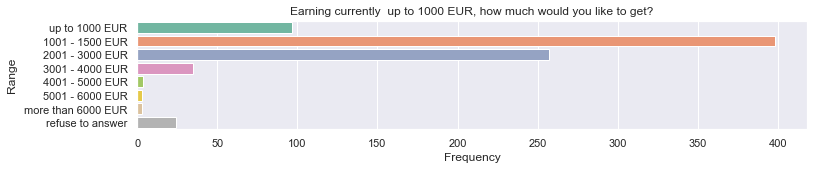

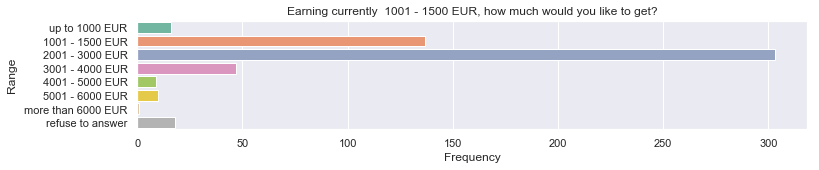

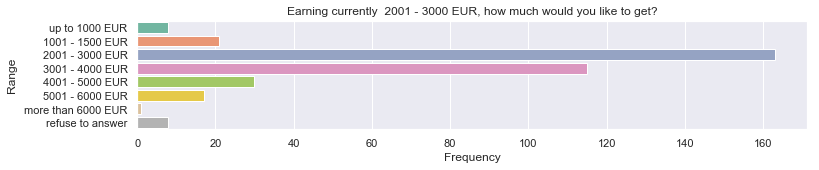

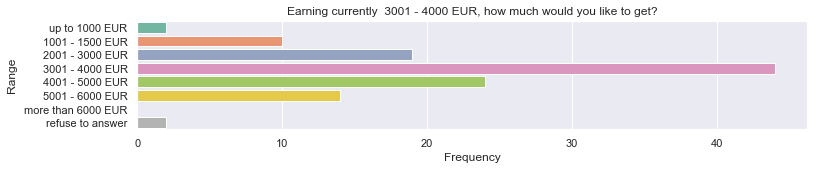

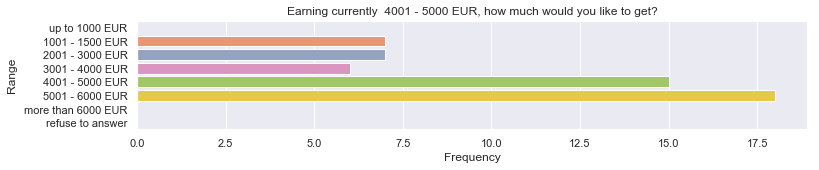

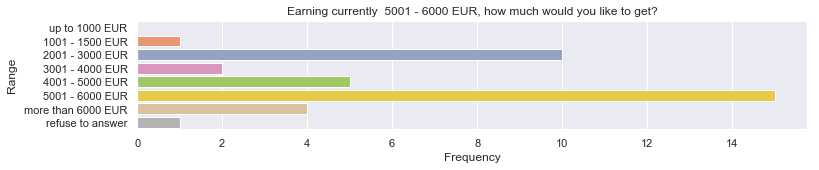

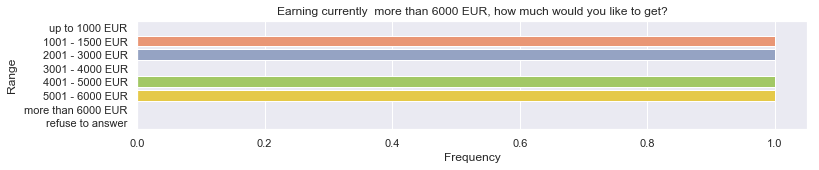

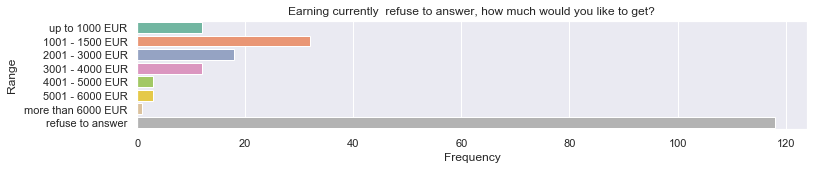

In [121]:
# Creating group list
g_list = [g1,g2,g3,g4,g5,g6,g7,g8]
col_list = np.array(df_income.columns[8:])

# Ploting results
for i in range(len(g_list)):
    expected_income_plot(g_list[i], col_list[i])

### Creating separated income-level groups

In [122]:
# Creating group indexes
u1_ix = df_income[df_income['What is your current or previous monthly net salary - up to 1000 EUR'].notnull()].index
u2_ix = df_income[df_income['What is your current or previous monthly net salary - 1001 - 1500 EUR'].notnull()].index
u3_ix = df_income[df_income['What is your current or previous monthly net salary - 2001 - 3000 EUR'].notnull()].index
u4_ix = df_income[df_income['What is your current or previous monthly net salary - 3001 - 4000 EUR'].notnull()].index
u5_ix = df_income[df_income['What is your current or previous monthly net salary - 4001 - 5000 EUR'].notnull()].index
u6_ix = df_income[df_income['What is your current or previous monthly net salary - 5001 - 6000 EUR'].notnull()].index
u7_ix = df_income[df_income['What is your current or previous monthly net salary - more than 6000 EUR'].notnull()].index
u8_ix = df_income[df_income['What is your current or previous monthly net salary - refuse to answer'].notnull()].index

In [123]:
# Creating groups
# Earning up to 1000 EUR
u1 = df[df.index.isin(u1_ix)]
# Earning between 1001-1500 EUR
u2 = df[df.index.isin(u2_ix)]
# ... and so on
u3 = df[df.index.isin(u3_ix)]
u4 = df[df.index.isin(u4_ix)]
u5 = df[df.index.isin(u5_ix)]
u6 = df[df.index.isin(u6_ix)]
u7 = df[df.index.isin(u7_ix)]
u8 = df[df.index.isin(u8_ix)]

In [124]:
# Helper function

def income_group_plot(group):
    
    
    sns.countplot(group['D2# Gender'], palette='Set2')
    plt.title('')
    plt.show()

    order = ['yes','no']
    sns.countplot(x='Are you looking for a job?', hue='D2# Gender', data=group, order=order, palette='Set2')
    plt.show()
    
    order = ['yes','no']
    sns.countplot(x='Q13-C22 - Do you work currently? - Answer', hue='D2# Gender', data=group, order=order, palette='Set2')
    plt.show()
    
    order = ['yes','no']
    sns.countplot(x='Have you ever worked before?', hue='D2# Gender', data=group, order=order, palette='Set2')
    plt.show()

    order = ['yes','no']
    sns.countplot(x='Are you keen on moving closer to your work place?', hue='D2# Gender', data=group, order=order, palette='Set2')
    plt.show()

    plt.figure(figsize=(20,4))
    order = ['village','city up to 20k inhabitants','20k - 49k inhabitants','50k - 99k inhabitants',
                  '100k - 199k inhabitants','200k - 500k inhabitants','more than 500k inhabitants']
    sns.countplot(x='D1# City size', hue='D2# Gender', data=group, order=order, palette='Set2')
    plt.show()

    plt.figure(figsize=(20,4))
    order = ['less than 18 years','18 - 24 years','25 - 30 years','31 - 40 years','41 - 50 years','more than 50 years']
    sns.countplot(x='D3# Age', hue='D2# Gender', data=group, order=order, palette='Set2')
    plt.show()

    plt.figure(figsize=(20,4))
    order = ['basic','vocational','secondary', 'higher']
    sns.countplot(x='D4# Education', hue='D2# Gender', data=group, order=order, palette='Set2')
    plt.show()

## Selecting `gender` as a differentiating variable between groups

But the defferentiating variable could be city size, commute distance etc.

### Earning up to 1000 EUR

In [125]:
# Helper function to differentiate income needs by gender

def income_needs_by_gender(main_group):
    
    # Selecting groups by gender
    female_group = main_group[main_group['D2# Gender'] == 'female'].describe(exclude='number').loc[:,'How much would you like to get monthly - up to 1000 EUR':'How much would you like to get monthly - refuse to answer':].T
    male_group = main_group[main_group['D2# Gender'] == 'male'].describe(exclude='number').loc[:,'How much would you like to get monthly - up to 1000 EUR':'How much would you like to get monthly - refuse to answer':].T
    
    i = 0
    for group in [female_group, male_group]:
        plt.figure(figsize=(12,2))
        sns.barplot(x='count', y='index', data=group.reset_index(),
                palette='Set2')
        labels = g1.loc['How much would you like to get monthly - up to 1000 EUR':,:]\
                    .reset_index()['index'].str.split('-', 1, expand=True)[1].values
        plt.yticks(rotation=0, ticks= range(len(labels)), labels=labels)
        plt.ylabel('Range')
        plt.xlabel('Frequency')
        plt.title('Female group income expectations') if i == 0 else plt.title('Male group income expectations')            
        plt.show()
        i += 1

In [ ]:
income_group_plot(u1)

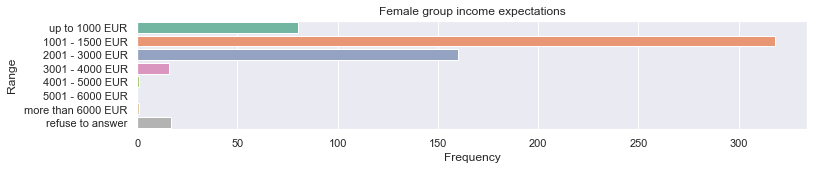

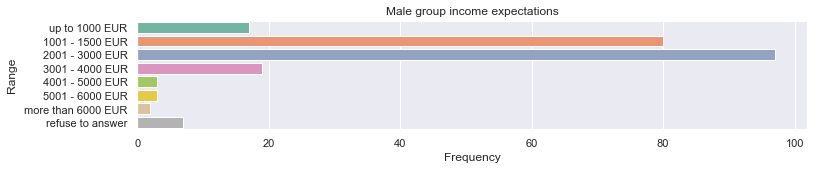

In [127]:
income_needs_by_gender(u1)

In [128]:
# How far do they live from work
# u1.describe(exclude='number').loc[:,'How far do you live from current or previous work - less than 5 km':'How far do you live from current or previous work - more than 100 km'].T

In [129]:
# How far are they able to commute?
# u1.describe(exclude='number').loc[:,'How far are you able to commute - less than 5 km':'How far are you able to commute - more than 100 km'].T

### Earning 1001-1500 EUR

In [ ]:
income_group_plot(u2)

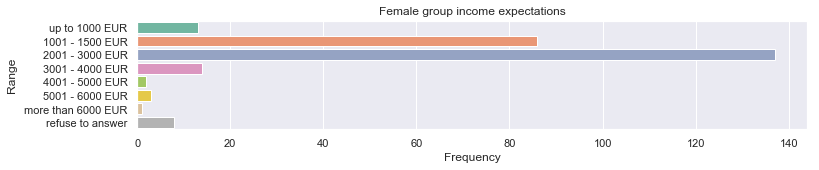

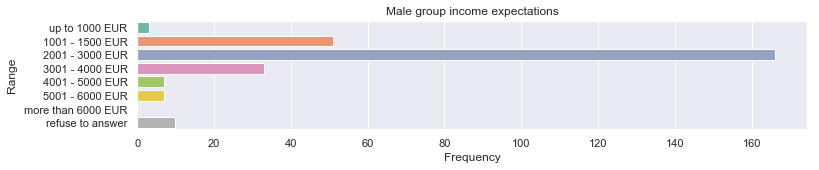

In [131]:
income_needs_by_gender(u2)

### Earning 2001-3000 EUR

In [ ]:
income_group_plot(u3)

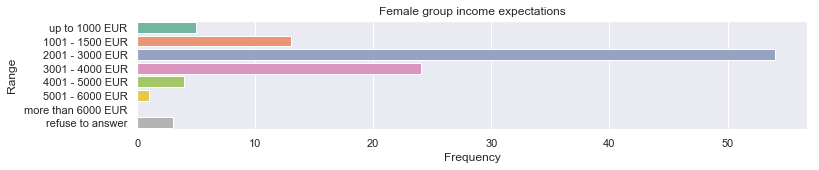

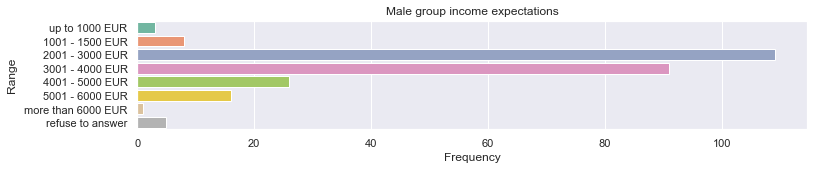

In [133]:
income_needs_by_gender(u3)

### Earning 3001-4000 EUR

In [ ]:
income_group_plot(u4)

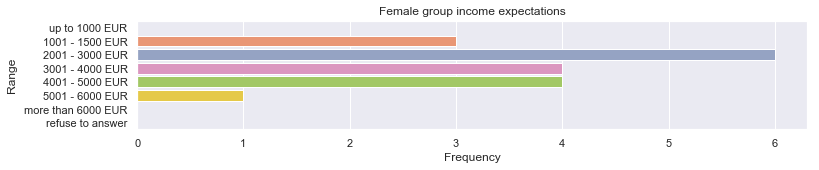

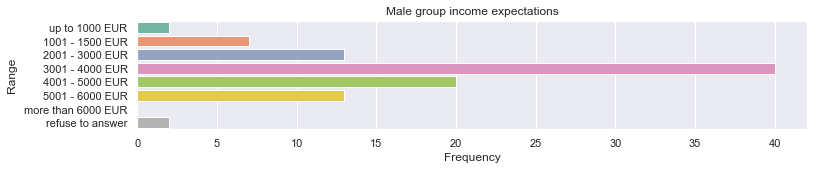

In [135]:
income_needs_by_gender(u4)

### Earning 4001-5000 EUR

In [ ]:
income_group_plot(u5)

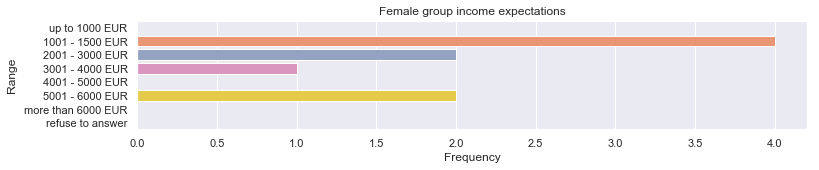

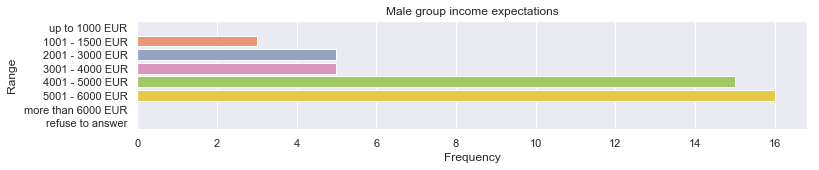

In [137]:
income_needs_by_gender(u5)

### Earning 5001-6000 EUR

In [ ]:
income_group_plot(u6)

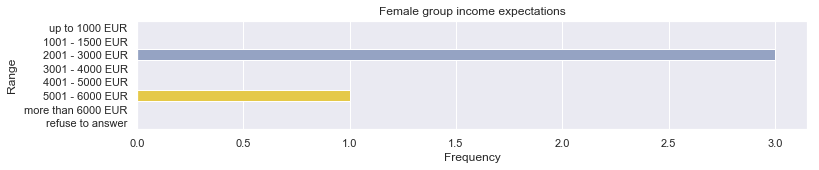

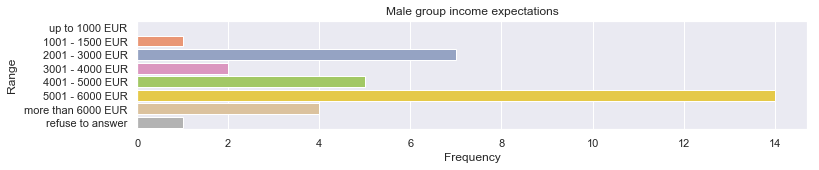

In [139]:
income_needs_by_gender(u6)

### Earning over 6000 EUR

In [ ]:
income_group_plot(u7)

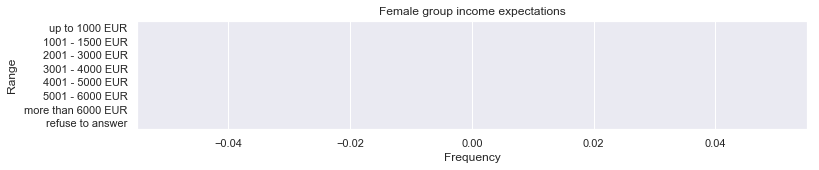

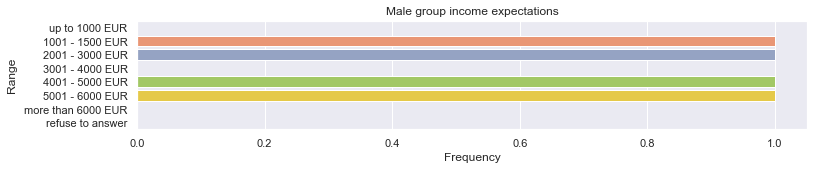

In [141]:
income_needs_by_gender(u7)

### Refused to answer how much do they earn currently

In [ ]:
income_group_plot(u8)

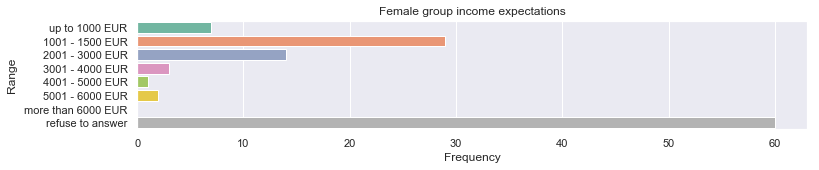

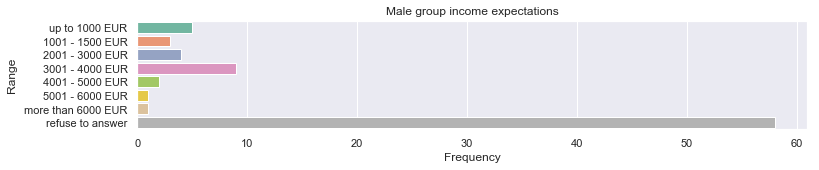

In [143]:
income_needs_by_gender(u8)

### Another solution to overall income and expectiations results divided by gender

In [144]:
# Merging df_income dataframe into two columns

# Replacing values to some meaningfull ones in current income columns
df_income.iloc[:,0] = df_income.iloc[:,0].where(df_income.iloc[:,0].isnull(), 'up1000')
df_income.iloc[:,1] = df_income.iloc[:,1].where(df_income.iloc[:,1].isnull(), '1001-1500')
df_income.iloc[:,2] = df_income.iloc[:,2].where(df_income.iloc[:,2].isnull(), '2001-3000')
df_income.iloc[:,3] = df_income.iloc[:,3].where(df_income.iloc[:,3].isnull(), '3001-4000')
df_income.iloc[:,4] = df_income.iloc[:,4].where(df_income.iloc[:,4].isnull(), '4001-5000')
df_income.iloc[:,5] = df_income.iloc[:,5].where(df_income.iloc[:,5].isnull(), '5001-6000')
df_income.iloc[:,6] = df_income.iloc[:,6].where(df_income.iloc[:,6].isnull(), 'ovr6000')
df_income.iloc[:,7] = df_income.iloc[:,7].where(df_income.iloc[:,7].isnull(), 'refuse answ')
# Replacing values to some meaningfull ones in expected income columns
df_income.iloc[:,8] = df_income.iloc[:,8].where(df_income.iloc[:,8].isnull(), 'up1000')
df_income.iloc[:,9] = df_income.iloc[:,9].where(df_income.iloc[:,9].isnull(), '1001-1500')
df_income.iloc[:,10] = df_income.iloc[:,10].where(df_income.iloc[:,10].isnull(), '2001-3000')
df_income.iloc[:,11] = df_income.iloc[:,11].where(df_income.iloc[:,11].isnull(), '3001-4000')
df_income.iloc[:,12] = df_income.iloc[:,12].where(df_income.iloc[:,12].isnull(), '4001-5000')
df_income.iloc[:,13] = df_income.iloc[:,13].where(df_income.iloc[:,13].isnull(), '5001-6000')
df_income.iloc[:,14] = df_income.iloc[:,14].where(df_income.iloc[:,14].isnull(), 'ovr6000')
df_income.iloc[:,15] = df_income.iloc[:,15].where(df_income.iloc[:,15].isnull(), 'refuse answ')

In [145]:
# Creating separate dataframes

# Current income 
df_income_curr = pd.DataFrame(df_income.loc[:,'What is your current or previous monthly net salary - up to 1000 EUR':'What is your current or previous monthly net salary - refuse to answer']\
                            .bfill(axis=1).iloc[:, 0])
df_income_curr.columns = ['Current Income']

# Expected income
df_income_exp = pd.DataFrame(df_income.loc[:,'How much would you like to get monthly - up to 1000 EUR':'How much would you like to get monthly - refuse to answer']\
                            .bfill(axis=1).iloc[:, 0])
df_income_exp.columns = ['Expected Income']

In [146]:
# Mergind above columns together
df_income_ = pd.concat([df_income_curr, df_income_exp], axis=1)

In [ ]:
# Creating dataframe with only valid income-related answers, and then merging all columns into two
df_adult = pd.concat([df[df.index.isin(df_income_.index)], df_income_curr, df_income_exp], axis=1)
df_adult.head(1)

In [ ]:
# Dropping useless columns
cols = list(df_adult.loc[:,'What is your current or previous monthly net salary - up to 1000 EUR':'How much would you like to get monthly - refuse to answer'].columns)
df_adult.drop(cols, axis=1, inplace=True)
df_adult.head(1)

In [149]:
# Helper function

def income_split_plot(split_column):
    
    order = ['up1000', '1001-1500', '2001-3000','3001-4000','4001-5000','5001-6000','ovr6000','refuse answ']
    plt.figure(figsize=(20, 6))
    sns.countplot(y='Current Income', hue=split_column, data=df_adult, order=order, palette='Set2')
    plt.show()
    plt.figure(figsize=(20, 6))
    sns.countplot(y='Expected Income', hue=split_column, data=df_adult, order=order, palette='Set2')
    plt.show()

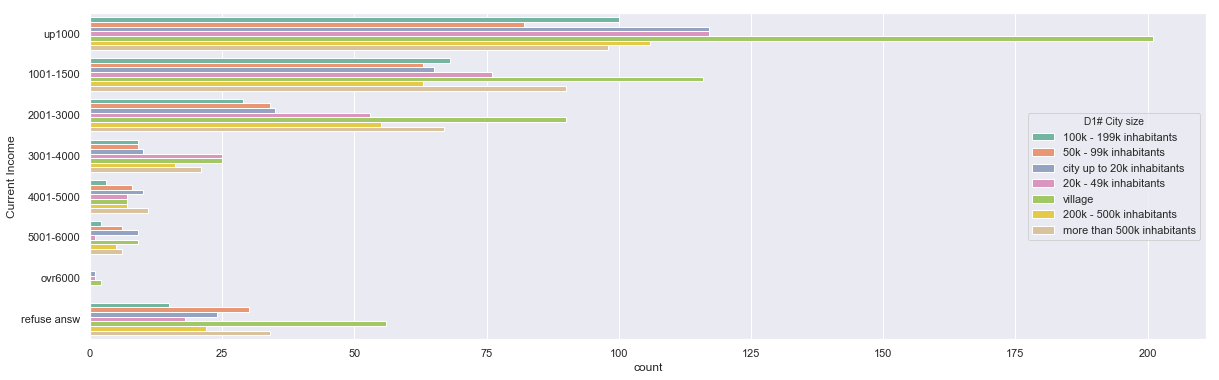

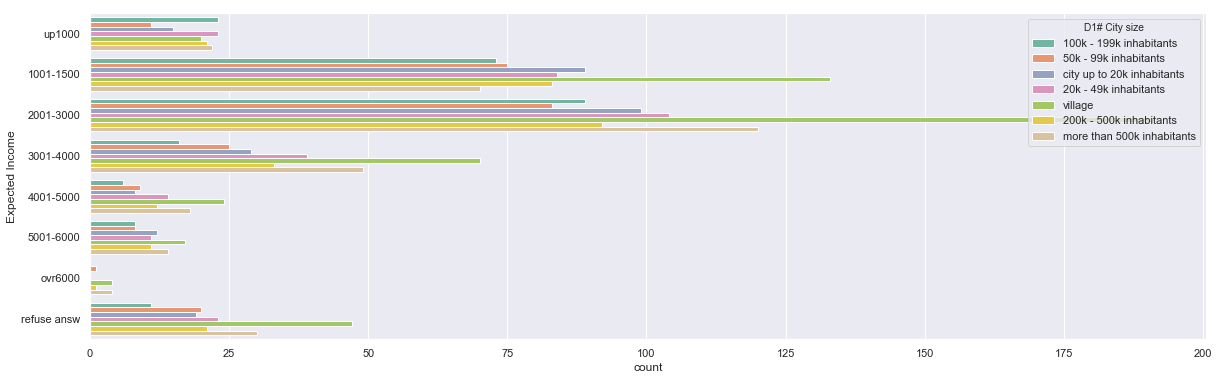

In [150]:
# Ploting data of interest
# The same can be done with different split method, eg. age or city size

income_split_plot('D1# City size')

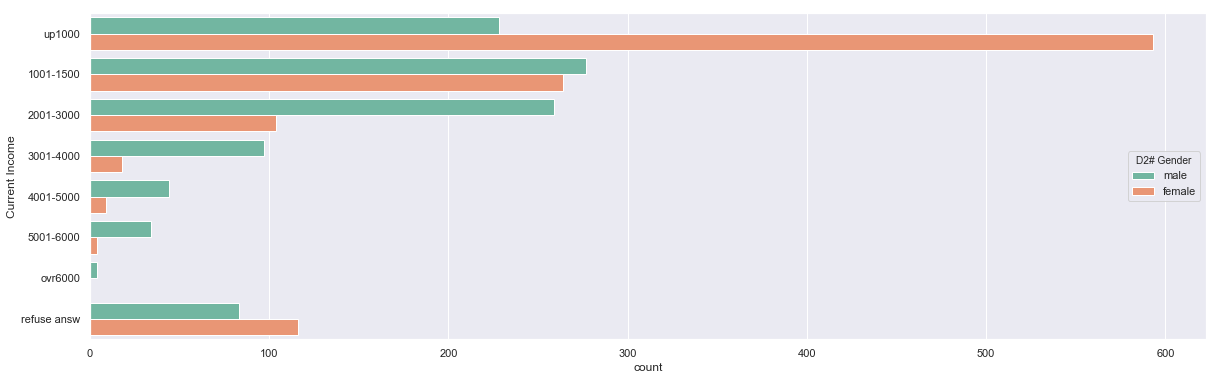

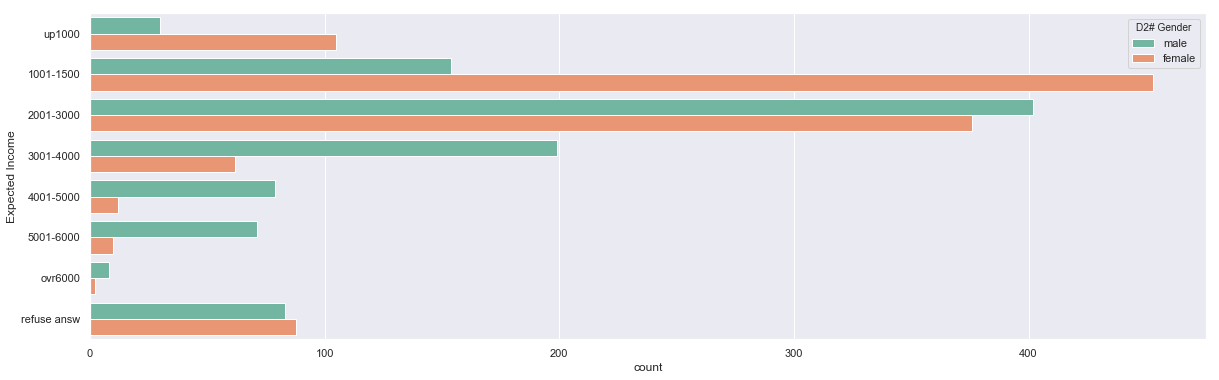

In [151]:
income_split_plot('D2# Gender')

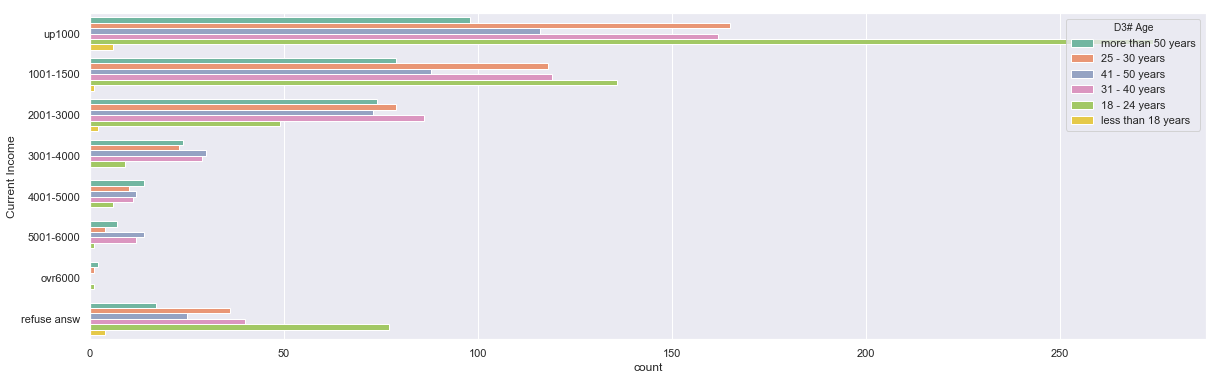

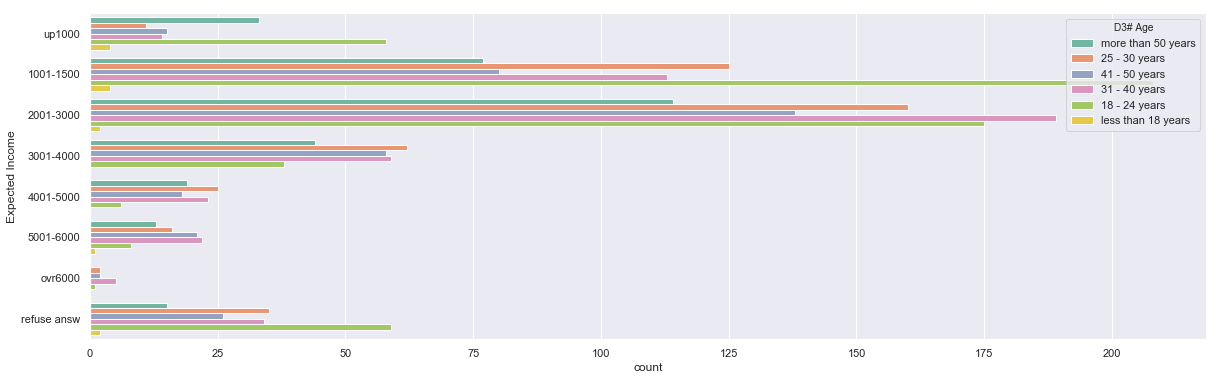

In [152]:
income_split_plot('D3# Age')

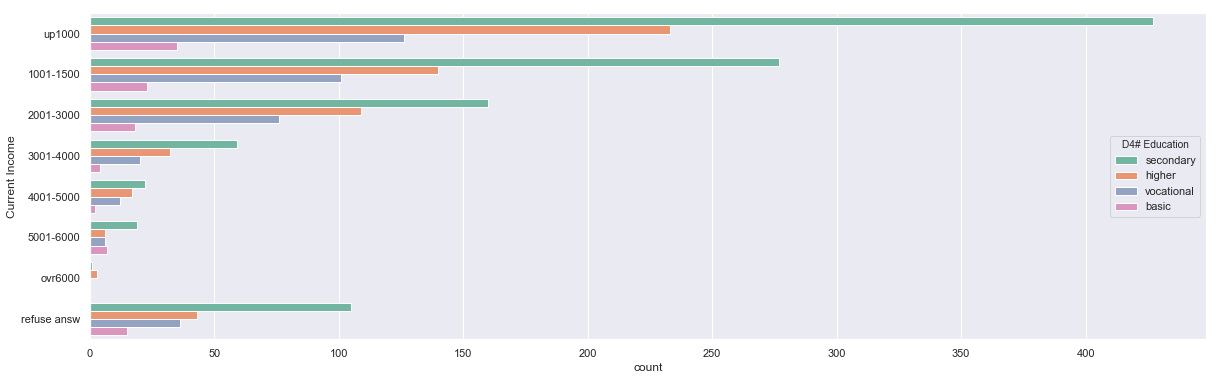

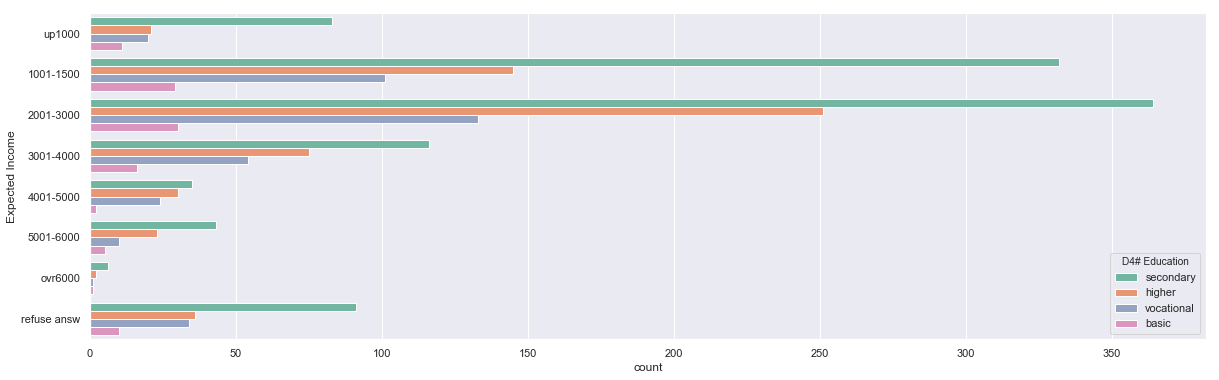

In [153]:
income_split_plot('D4# Education')

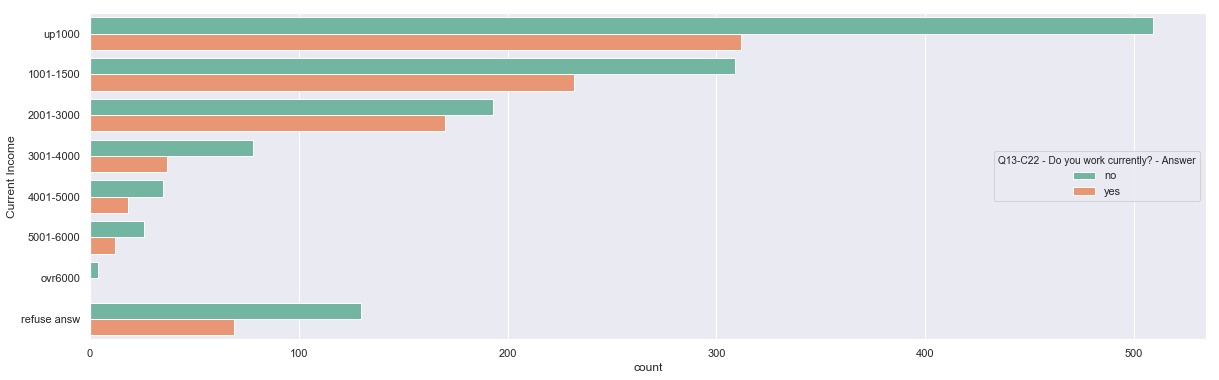

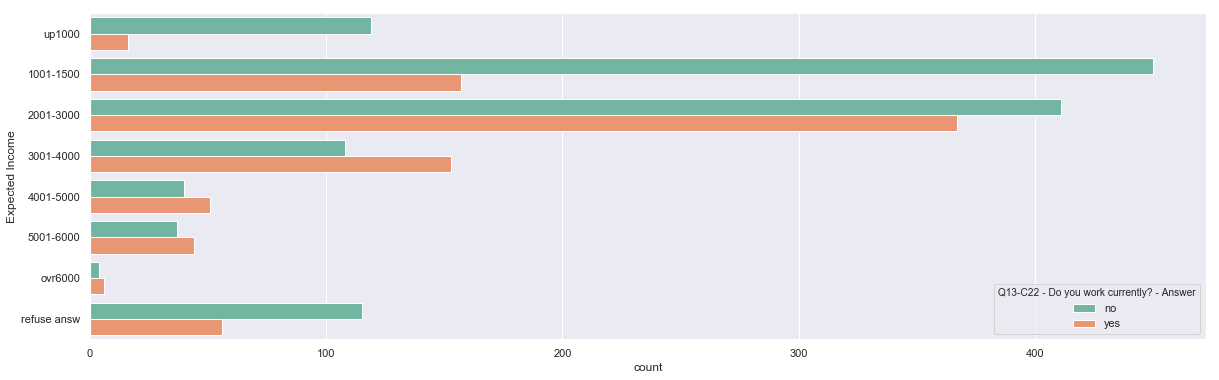

In [154]:
income_split_plot('Q13-C22 - Do you work currently? - Answer')

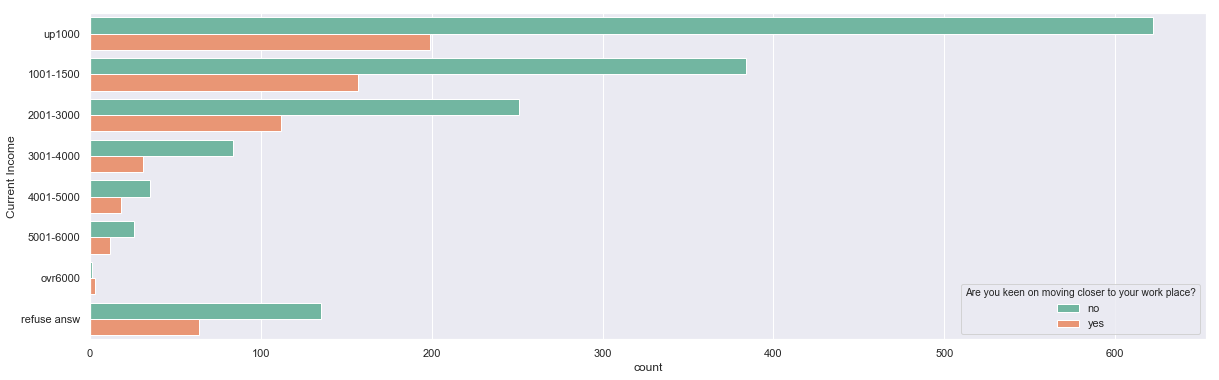

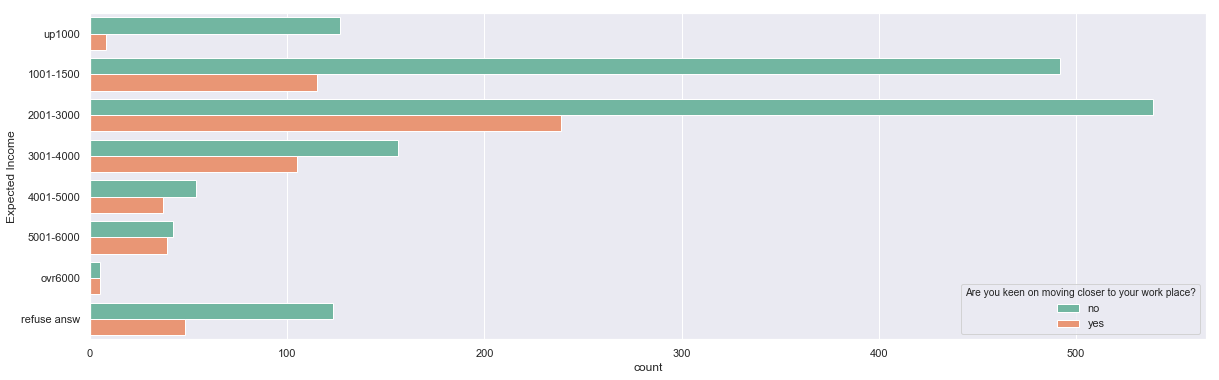

In [155]:
income_split_plot('Are you keen on moving closer to your work place?')

# What is the correlation between the desire to earn more and the possibility to commute longer (further away from home).

<br><br>
**Conclusions:**
<br>
It seems that with lower income expectations (up to 1500 EUR) the respondents would commute rather on closer distances (up to 5 km, but also slightly further like up to 10 km, but definetly not over 50 km). With the growing expectations (2000-3000 EUR) there is small tendency to commute little bit further (5-10 km or even up to 20 km). With even higher expectations (3000-4000 EUR) there is a little bit raise in a willingness to commute up to 50 km. After the income expectations reach 4000-5000 EUR the responders tend to commute rather either 10-20 or 20-50 km than less or more of that distance. For the expecting 5000-6000 EUR it nearly doesn't matter the distance to commute, and if expectations raise above that threshold it's become clear not to commute further than 50 km with the 10-20 km range in favour.

**Summarizing, with an increase in income expectations, the desire for further commuting also increases, but only up to a very high threshold when the distance becomes irrelevant. After that threshold it becomes very important not to commute on very far distances similarly as with the lowest income expectations**
<br><br>
**Note**:
When we split responders by gender we see that they mostly differ in expected income distribution but commuting patterns remain almost the same with tendency for men to commute further, even over 100 km when expecting middle level income and above.
<br><br>
Further analysis can be made taking into account city size, age and so on.
<br><br><br>

In [156]:
# Checking no- and multi-answered observations and getting rid of them
live_double_answers_check = df_adult.loc[:,'How far do you live from current or previous work - less than 5 km':'How far do you live from current or previous work - more than 100 km']
commute_double_answers_check = df_adult.loc[:,'How far are you able to commute - less than 5 km':'How far are you able to commute - more than 100 km']

Number of not-answered and multi-answered questions: 43 of 2134. 
            Ploting only valid 2091 entries


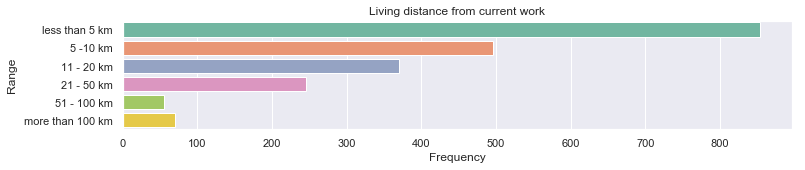

Sample invalid data


,How far do you live from current or previous work - less than 5 km,How far do you live from current or previous work - 5 -10 km,How far do you live from current or previous work - 11 - 20 km,How far do you live from current or previous work - 21 - 50 km,How far do you live from current or previous work - 51 - 100 km,How far do you live from current or previous work - more than 100 km
51,previous job,previous job,previous job,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
# Living distance from current work
valid_answers_plot(live_double_answers_check, 'Living distance from current work')
print('Sample invalid data')
live_double_answers_check[live_double_answers_check.notnull().sum(axis=1) != 1].head(2)

Number of not-answered and multi-answered questions: 330 of 2134. 
            Ploting only valid 1804 entries


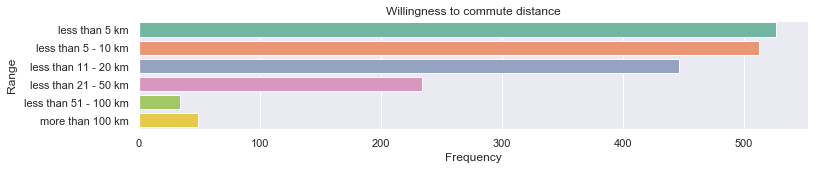

Sample invalid data


,How far are you able to commute - less than 5 km,How far are you able to commute - less than 5 - 10 km,How far are you able to commute - less than 11 - 20 km,How far are you able to commute - less than 21 - 50 km,How far are you able to commute - less than 51 - 100 km,How far are you able to commute - more than 100 km
5,sought-after job,sought-after job,sought-after job,sought-after job,NaN,NaN
6,sought-after job,sought-after job,sought-after job,NaN,NaN,NaN


In [158]:
# Distance of willingness to commute to work
valid_answers_plot(commute_double_answers_check, 'Willingness to commute distance')
print('Sample invalid data')
commute_double_answers_check[commute_double_answers_check.notnull().sum(axis=1) != 1].head(2)

In [159]:
# Selecting columns with one answer only
df_commute_ = commute_double_answers_check[commute_double_answers_check.notnull().sum(axis=1) == 1]
df_live_ = live_double_answers_check[live_double_answers_check.notnull().sum(axis=1) == 1]

In [ ]:
# Replacing values to some meaningfull ones in current income columns
df_live_.iloc[:,0] = df_live_.iloc[:,0].where(df_live_.iloc[:,0].isnull(), 'less 5')
df_live_.iloc[:,1] = df_live_.iloc[:,1].where(df_live_.iloc[:,1].isnull(), '5-10')
df_live_.iloc[:,2] = df_live_.iloc[:,2].where(df_live_.iloc[:,2].isnull(), '11-20')
df_live_.iloc[:,3] = df_live_.iloc[:,3].where(df_live_.iloc[:,3].isnull(), '21-50')
df_live_.iloc[:,4] = df_live_.iloc[:,4].where(df_live_.iloc[:,4].isnull(), '51-100')
df_live_.iloc[:,5] = df_live_.iloc[:,5].where(df_live_.iloc[:,5].isnull(), 'over 100')

# Replacing values to some meaningfull ones in expected income columns
df_commute_.iloc[:,0] = df_commute_.iloc[:,0].where(df_commute_.iloc[:,0].isnull(), 'less 5')
df_commute_.iloc[:,1] = df_commute_.iloc[:,1].where(df_commute_.iloc[:,1].isnull(), '5-10')
df_commute_.iloc[:,2] = df_commute_.iloc[:,2].where(df_commute_.iloc[:,2].isnull(), '11-20')
df_commute_.iloc[:,3] = df_commute_.iloc[:,3].where(df_commute_.iloc[:,3].isnull(), '21-50')
df_commute_.iloc[:,4] = df_commute_.iloc[:,4].where(df_commute_.iloc[:,4].isnull(), '51-100')
df_commute_.iloc[:,5] = df_commute_.iloc[:,5].where(df_commute_.iloc[:,5].isnull(), 'over 100')

In [161]:
# Creating separate dataframes

# Current income 
df_live_ = pd.DataFrame(df_live_.loc[:,df_live_.columns[0]:df_live_.columns[5]].bfill(axis=1).iloc[:, 0])
df_live_.columns = ['Living distance']

# Expected income
df_commute_ = pd.DataFrame(df_commute_.loc[:,df_commute_.columns[0]:df_commute_.columns[5]].bfill(axis=1).iloc[:, 0])
df_commute_.columns = ['Able to commute']

In [ ]:
# Putting together commute-related 

df_living_commute = pd.concat([df_live_, df_commute_], axis=1)
df_living_commute = df_living_commute.dropna()
df_living_commute.head()

In [ ]:
df_adult.shape, df_living_commute.shape

In [ ]:
df_adult[df_adult.index.isin(df_living_commute.index)].shape

In [ ]:
# Creating dataframe with only valid income-related answers, and then merging all columns into two
df_adult_all = pd.concat([df_adult[df_adult.index.isin(df_living_commute.index)], df_living_commute], axis=1)
df_adult_all.head(1)

In [ ]:
# Dropping useless columns
cols = list(df_adult_all.loc[:,'How far do you live from current or previous work - less than 5 km':'How far are you able to commute - more than 100 km'].columns)
df_adult_all.drop(cols, axis=1, inplace=True)
df_adult_all.head(1)

**Plotting result for conclusions**

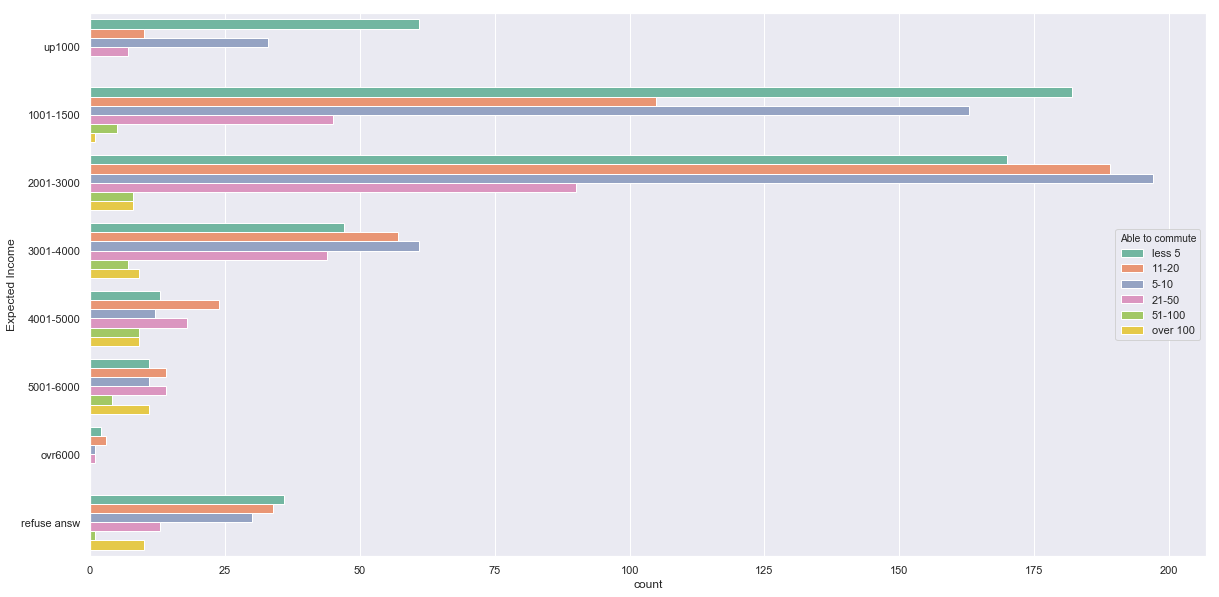

In [167]:
# Ploting results
order = ['up1000', '1001-1500', '2001-3000','3001-4000','4001-5000','5001-6000','ovr6000','refuse answ']
# order = ['less 5','5-10','11-20','21-50','51-100','over 100']
plt.figure(figsize=(20, 10))
sns.countplot(y='Expected Income', hue='Able to commute', data=df_adult_all, order=order, palette='Set2')
plt.show()

It seems that with lower income expectations (up to 1500 EUR) the respondents would commute rather on closer distances (up to 5 km, but also slightly further like up to 10 km, but definetly not over 50 km). With the growing expectations (2000-3000 EUR) there is small tendency to commute little bit further (5-10 km or even up to 20 km). With even higher expectations (3000-4000 EUR) there is a little bit raise in a willingness to commute up to 50 km. After the income expectations reach 4000-5000 EUR the responders tend to commute rather either 10-20 or 20-50 km than less or more of that distance. For the expecting 5000-6000 EUR it nearly doesn't matter the distance to commute, and if expectations raise above that threshold it's become clear not to commute further than 50 km with the 10-20 km range in favour.

**Looking at the gender split**

In [168]:
df_adult_all['D2# Gender'].value_counts()

female    916
male      864
Name: D2# Gender, dtype: int64

In [169]:
# Helper function

def income_commute_plot(splitting_column):    
    order = ['up1000', '1001-1500', '2001-3000','3001-4000','4001-5000','5001-6000','ovr6000','refuse answ']
    sns.catplot(y="Expected Income", hue="Able to commute", col=splitting_column,
                    data=df_adult_all, kind="count", order=order,
                    height=7, aspect=1, palette='Set2')
    plt.show()

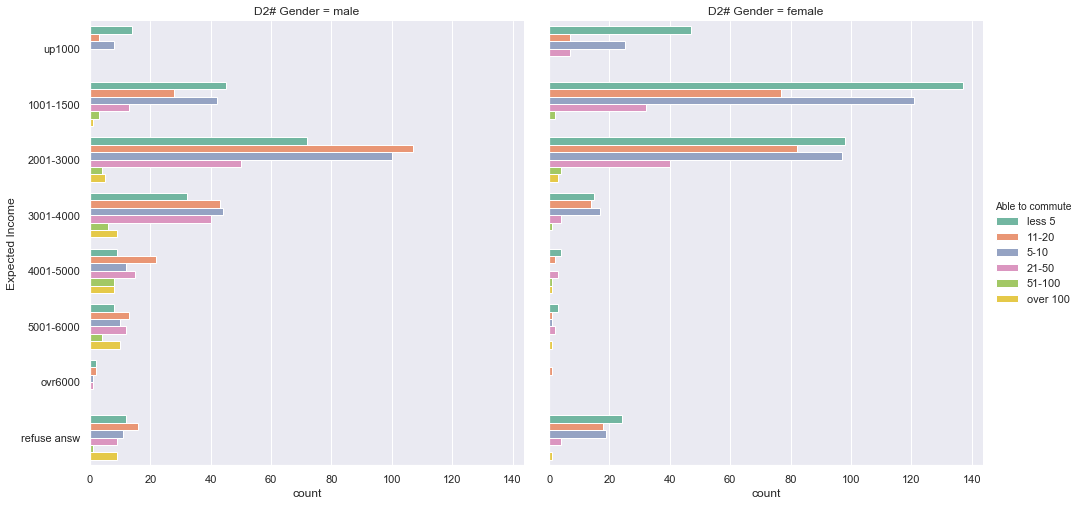

In [170]:
income_commute_plot('D2# Gender')

When we split responders by gender we see that they mostly differ in expected income distribution but commuting patterns remain almost the same with tendency for men to commute further, even over 100 km when expecting middle level income and above.

Further analysis can be made taking into account city size, age and so on.

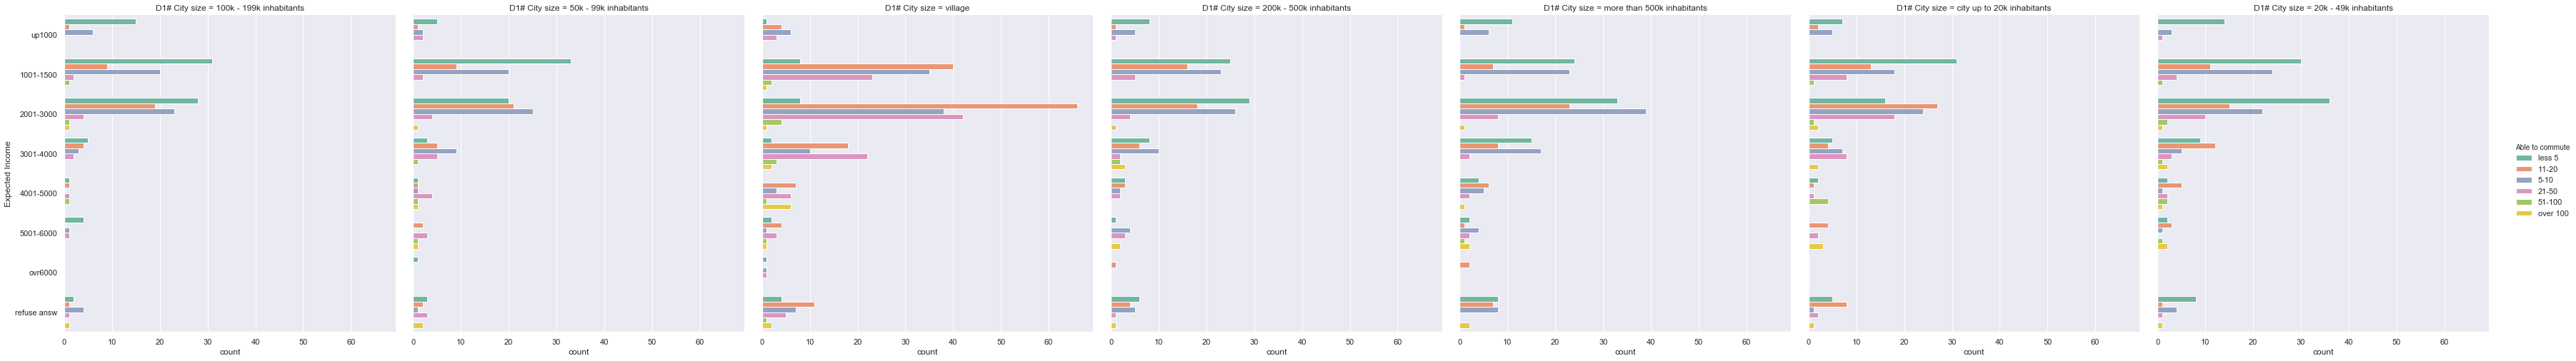

In [171]:
income_commute_plot('D1# City size')

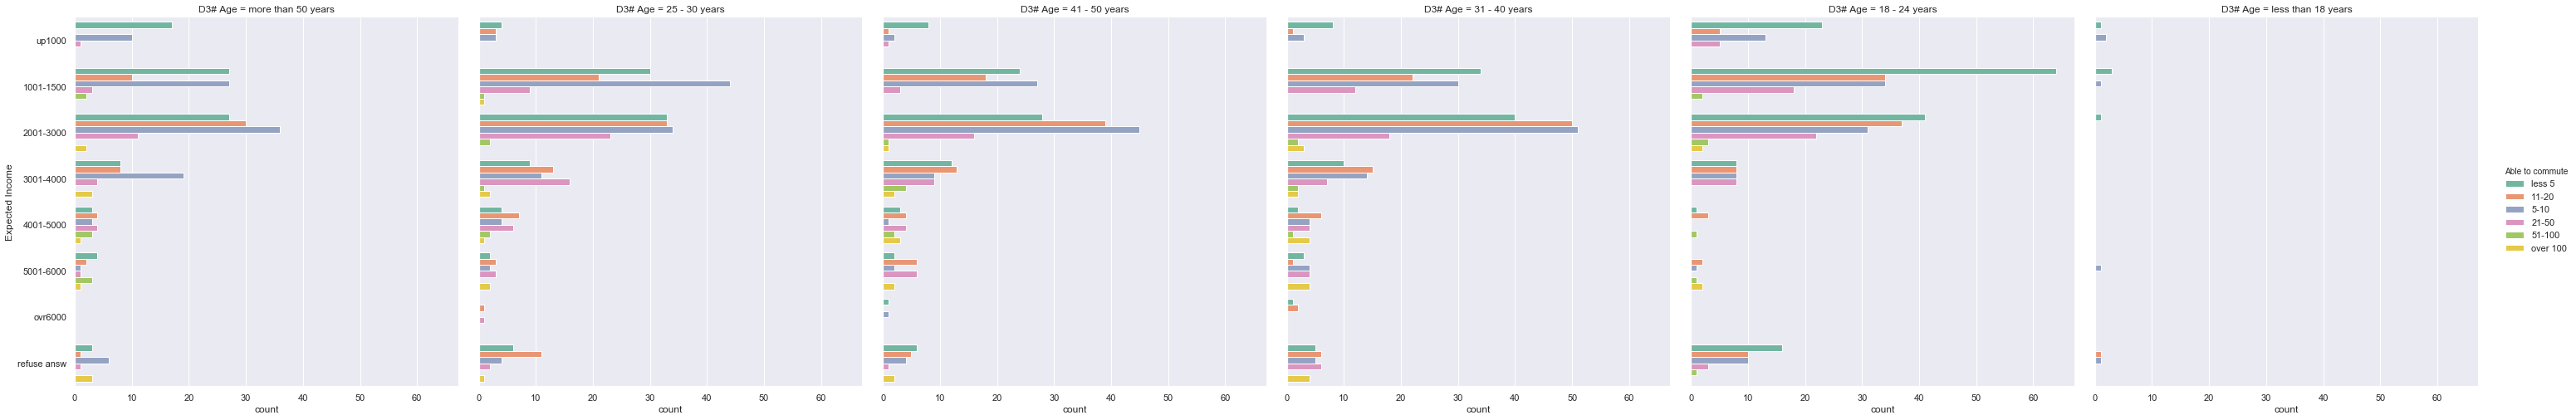

In [172]:
income_commute_plot('D3# Age')

# What is the key factor that determines the tendency to move closer to the work place (what is the most relevant factor influencing the will to move home closer work)?

<br><br><br>
**Conclusion:**

Two approaches - feature importance search and statistical tests - were used to spot the key factor that determines the tendency to move closer to the work place. The first approach was conducted on one-hot encoded dataset, and statistical tests were conducted on both rank-mapped and one-hot encoded datasets.

Using tree-based algorithm (RandomForest) resulted in selecting Top5 features in order of importance:
* Current income  up tp 1000 EUR
* Less than 5km living distance from work place
* Secondary grade education
* Age 18-24 years
* Able to commute between 5-10 km

However at this point the model is not stable and can not point exacly one, most important feature. Further analysis or approach change is needed if time allows.

Both Spearman's rank (for rank-mapped dataset) Pearson's (for one-hot encoded dataset) correlation tests together with Kruskal-Wallis test were used as statistical approach.

Resulted feature importances:
* Spearman's test - "Expected Income" and "Able to commute"/"Gender"
* Pearson's test - "Able to commute over 100km"*
* Kruskal-Wallis test - further analysis needed

There's also need for further statistical approach verification.

*seems to be not very intuitive

<br><br><br><br>

In [ ]:
df_closer_work = df_adult_all[df_adult_all['Are you keen on moving closer to your work place?'] == 'yes']
df_closer_work.head()

<br><br><br>
**Looking at the typical person keen to moving closer to the work place**

In [174]:
df_closer_work.describe(exclude='number').T

,count,unique,top,freq
Are you looking for a job?,492,1,yes,492
Q13-C22 - Do you work currently? - Answer,492,2,no,251
Have you ever worked before?,251,1,yes,251
Are you keen on moving closer to your work place?,492,1,yes,492
D1# City size,492,7,village,127
D2# Gender,492,2,male,282
D3# Age,492,6,18 - 24 years,138
D4# Education,492,4,secondary,224
Current Income,492,8,up1000,165
Expected Income,492,8,2001-3000,200


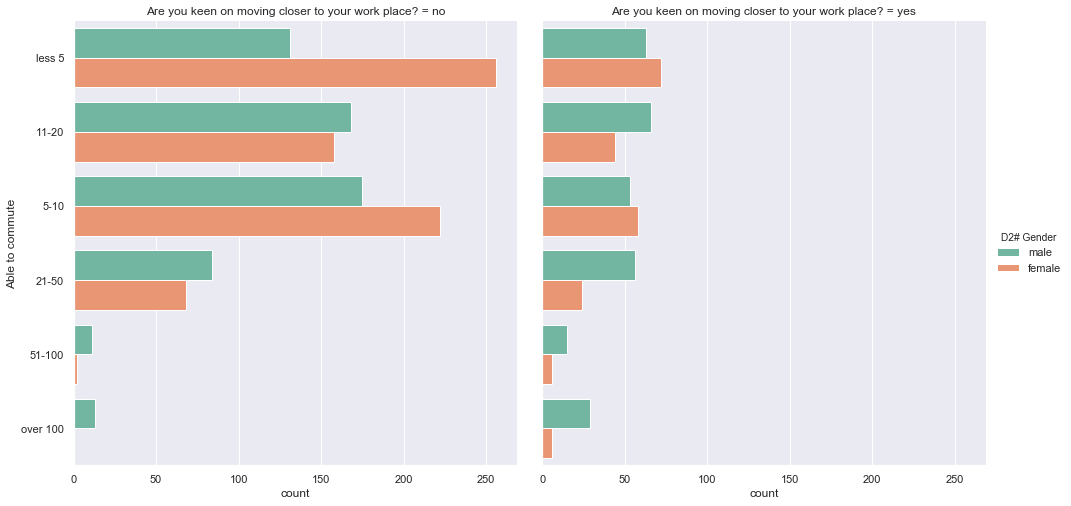

In [175]:
#     order = ['up1000', '1001-1500', '2001-3000','3001-4000','4001-5000','5001-6000','ovr6000','refuse answ']
sns.catplot(y='Able to commute', hue='D2# Gender', col='Are you keen on moving closer to your work place?',
                data=df_adult_all, kind="count",
                height=7, aspect=1, palette='Set2')
plt.show()

<br><br><br>
**Differences between groups that are and are not keen to move closer to work place**

In [176]:
df_adult_all.groupby('Are you keen on moving closer to your work place?').describe(exclude='number').T

Are you keen on moving closer to your work place?             no  \
Able to commute                           count             1288   
                                          unique               6   
                                          top               5-10   
                                          freq               397   
Are you looking for a job?                count             1288   
                                          unique               1   
                                          top                yes   
                                          freq              1288   
Current Income                            count             1288   
                                          unique               8   
                                          top             up1000   
                                          freq               510   
D1# City size                             count             1288   
                                          unique               7   
                                          top            village   
                                          freq               280   
D2# Gender                                count             1288   
                                          unique               2   
                                          top             female   
                                          freq               706   
D3# Age                                   count             1288   
                                          unique               6   
                                          top      31 - 40 years   
                                          freq               289   
D4# Education                             count             1288   
                                          unique               4   
                                          top          secondary   
                                          freq               653   
Expected Income                           count             1288   
                                          unique               8   
                                          top          2001-3000   
                                          freq               462   
Have you ever worked before?              count              803   
                                          unique               1   
                                          top                yes   
                                          freq               803   
Living distance                           count             1288   
                                          unique               6   
                                          top             less 5   
                                          freq               541   
Q13-C22 - Do you work currently? - Answer count             1288   
                                          unique               2   
                                          top                 no   
                                          freq               803   

Are you keen on moving closer to your work place?            yes  
Able to commute                           count              492  
                                          unique               6  
                                          top             less 5  
                                          freq               135  
Are you looking for a job?                count              492  
                                          unique               1  
                                          top                yes  
                                          freq               492  
Current Income                            count              492  
                                          unique               8  
                                          top             up1000  
                                          freq               165  
D1# City size                             count              492  
 

In [177]:
# pd.crosstab(df_adult_all['Able to commute'], df_adult_all['Are you keen on moving closer to your work place?'],
#            normalize=False, margins=True)

### Trying with feature importance search

In [178]:
df_adult_all.head(2)

,id,Are you looking for a job?,Q13-C22 - Do you work currently? - Answer,Have you ever worked before?,Are you keen on moving closer to your work place?,D1# City size,D2# Gender,D3# Age,D4# Education,Current Income,Expected Income,Living distance,Able to commute
1,2,yes,no,yes,no,100k - 199k inhabitants,male,more than 50 years,secondary,2001-3000,2001-3000,less 5,less 5
4,5,yes,no,yes,no,50k - 99k inhabitants,female,25 - 30 years,secondary,up1000,1001-1500,less 5,less 5


In [179]:
# Copy for rank remapping
df_adult_all_num = df_adult_all.copy()

# Copy for feature importance check with classification approach
df_adult_all_onehot = df_adult_all.copy()

**One-hot encoding for feature importance search**

In [180]:
df_adult_all_onehot['Are you keen on moving closer to your work place?'] = df_adult_all_onehot['Are you keen on moving closer to your work place?'].map({'yes':1, 'no':0})

**Remapping ordinal features into ranks**

In [181]:
df_adult_all_num['Are you keen on moving closer to your work place?'] = df_adult_all_num['Are you keen on moving closer to your work place?'].map({'yes':1, 'no':0})

df_adult_all_num['Are you looking for a job?'] = df_adult_all_num['Are you looking for a job?'].map({'yes':1, 'no':0})
df_adult_all_num['Q13-C22 - Do you work currently? - Answer'] = df_adult_all_num['Q13-C22 - Do you work currently? - Answer'].map({'yes':1, 'no':0})
df_adult_all_num['Have you ever worked before?'] = df_adult_all_num['Have you ever worked before?'].map({'yes':1, np.NaN:0})
df_adult_all_num['D2# Gender'] = df_adult_all_num['D2# Gender'].map({'male':1, 'female':0})
df_adult_all_num['D1# City size'] = df_adult_all_num['D1# City size'].map({
    'village':1,
    'city up to 20k inhabitants':2,
    '20k - 49k inhabitants':3,
    '50k - 99k inhabitants':4,
    '100k - 199k inhabitants':5,
    '200k - 500k inhabitants':6,
    'more than 500k inhabitants':7
})
df_adult_all_num['D3# Age'] = df_adult_all_num['D3# Age'].map({
    'less than 18 years':1,
    '18 - 24 years':2,
    '25 - 30 years':3,
    '31 - 40 years':4,
    '41 - 50 years':5,
    'more than 50 years':6
})
df_adult_all_num['D4# Education'] = df_adult_all_num['D4# Education'].map({
    'basic':1,
    'vocational':2,
    'secondary':3,
    'higher':4
})
df_adult_all_num['Current Income'] = df_adult_all_num['Current Income'].map({
    'refuse answ':1,
    'up1000':2,
    '1001-1500':3,
    '2001-3000':4,
    '3001-4000':5,
    '4001-5000':6,
    '5001-6000':7,
    'ovr6000':8
})
df_adult_all_num['Expected Income'] = df_adult_all_num['Expected Income'].map({
    'refuse answ':1,
    'up1000':2,
    '1001-1500':3,
    '2001-3000':4,
    '3001-4000':5,
    '4001-5000':6,
    '5001-6000':7,
    'ovr6000':8
})
df_adult_all_num['Living distance'] = df_adult_all_num['Living distance'].map({
    'less 5':1,
    '5-10':2,
    '11-20':3,
    '21-50':4,
    '51-100':5,
    'over 100':6
})
df_adult_all_num['Able to commute'] = df_adult_all_num['Able to commute'].map({
    'less 5':1,
    '5-10':2,
    '11-20':3,
    '21-50':4,
    '51-100':5,
    'over 100':6
})

In [ ]:
df_adult_all_num.head(2)

### Feature importance search with classification approach

In [ ]:
# Selecting categorical data 
data_categorical = df_adult_all_onehot.select_dtypes(exclude = ['number'])
data_categorical.head()

In [184]:
df_adult_all_feature = pd.concat([df_adult_all_onehot['Are you keen on moving closer to your work place?'], 
                                  pd.get_dummies(data_categorical)], axis=1)

In [ ]:
df_adult_all_feature.head()

In [186]:
data_train, data_test = train_test_split(df_adult_all_feature, test_size=0.3, shuffle=False)

In [187]:
y_train = data_train.pop('Are you keen on moving closer to your work place?')
y_test = data_test.pop('Are you keen on moving closer to your work place?')

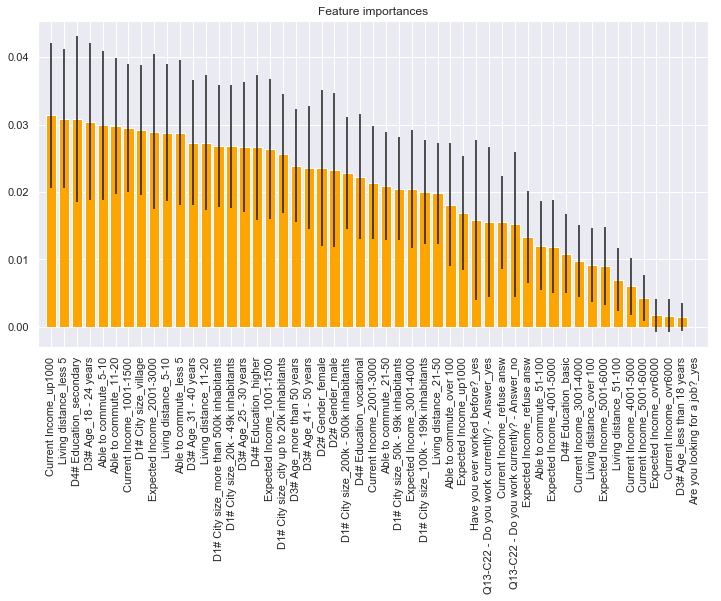

In [188]:
# Building model
forest = RandomForestClassifier(n_estimators=500,
                                random_state=42,
                                class_weight='balanced',
                                n_jobs=-1)

forest.fit(data_train, y_train)
importances = np.mean([tree.feature_importances_ for tree in forest.estimators_], axis=0)
stds = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
inds = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[inds],
       color="orange", yerr=stds[inds], align="center")
plt.xticks(range(data_train.shape[1]), data_train.columns[inds], rotation='vertical')
plt.xlim([-1, data_train.shape[1]])
plt.show()

In [189]:
print(classification_report(y_test, forest.predict(data_test)))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       387
           1       0.43      0.15      0.22       147

   micro avg       0.71      0.71      0.71       534
   macro avg       0.59      0.54      0.52       534
weighted avg       0.66      0.71      0.66       534



### Trying with some statistical tests

**Spearman's correlation**

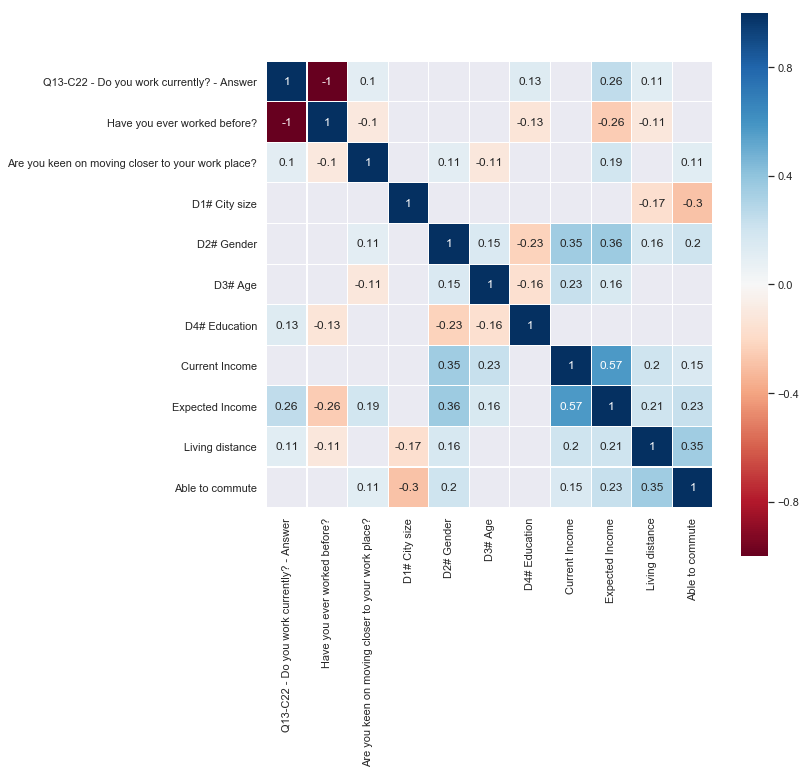

In [199]:
corr = df_adult_all_num.drop(['Are you looking for a job?', 'id'], axis=1).corr('spearman')

plt.figure(figsize=(10,10))
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], annot=True, square=True, linewidths=0.1, cmap='RdBu');

In [200]:
corr[abs(corr) > 0.1]['Are you keen on moving closer to your work place?'].sort_values(ascending=False).head(10)

Are you keen on moving closer to your work place?    1.000000
Expected Income                                      0.192232
Able to commute                                      0.113306
D2# Gender                                           0.108548
Q13-C22 - Do you work currently? - Answer            0.103091
Have you ever worked before?                        -0.103091
D3# Age                                             -0.113463
D1# City size                                             NaN
D4# Education                                             NaN
Current Income                                            NaN
Name: Are you keen on moving closer to your work place?, dtype: float64

In [ ]:
# Checking results using stats library

for col in df_adult_all_num.columns:
    if stats.spearmanr(df_adult_all_num['Are you keen on moving closer to your work place?'],
                      df_adult_all_num[col])[1] <= 0.05:
        print(stats.spearmanr(df_adult_all_num['Are you keen on moving closer to your work place?'],
                                                                       df_adult_all_num[col])[0],
             '  --- Spearman coeff. for', col)

**Pearson's correlation**

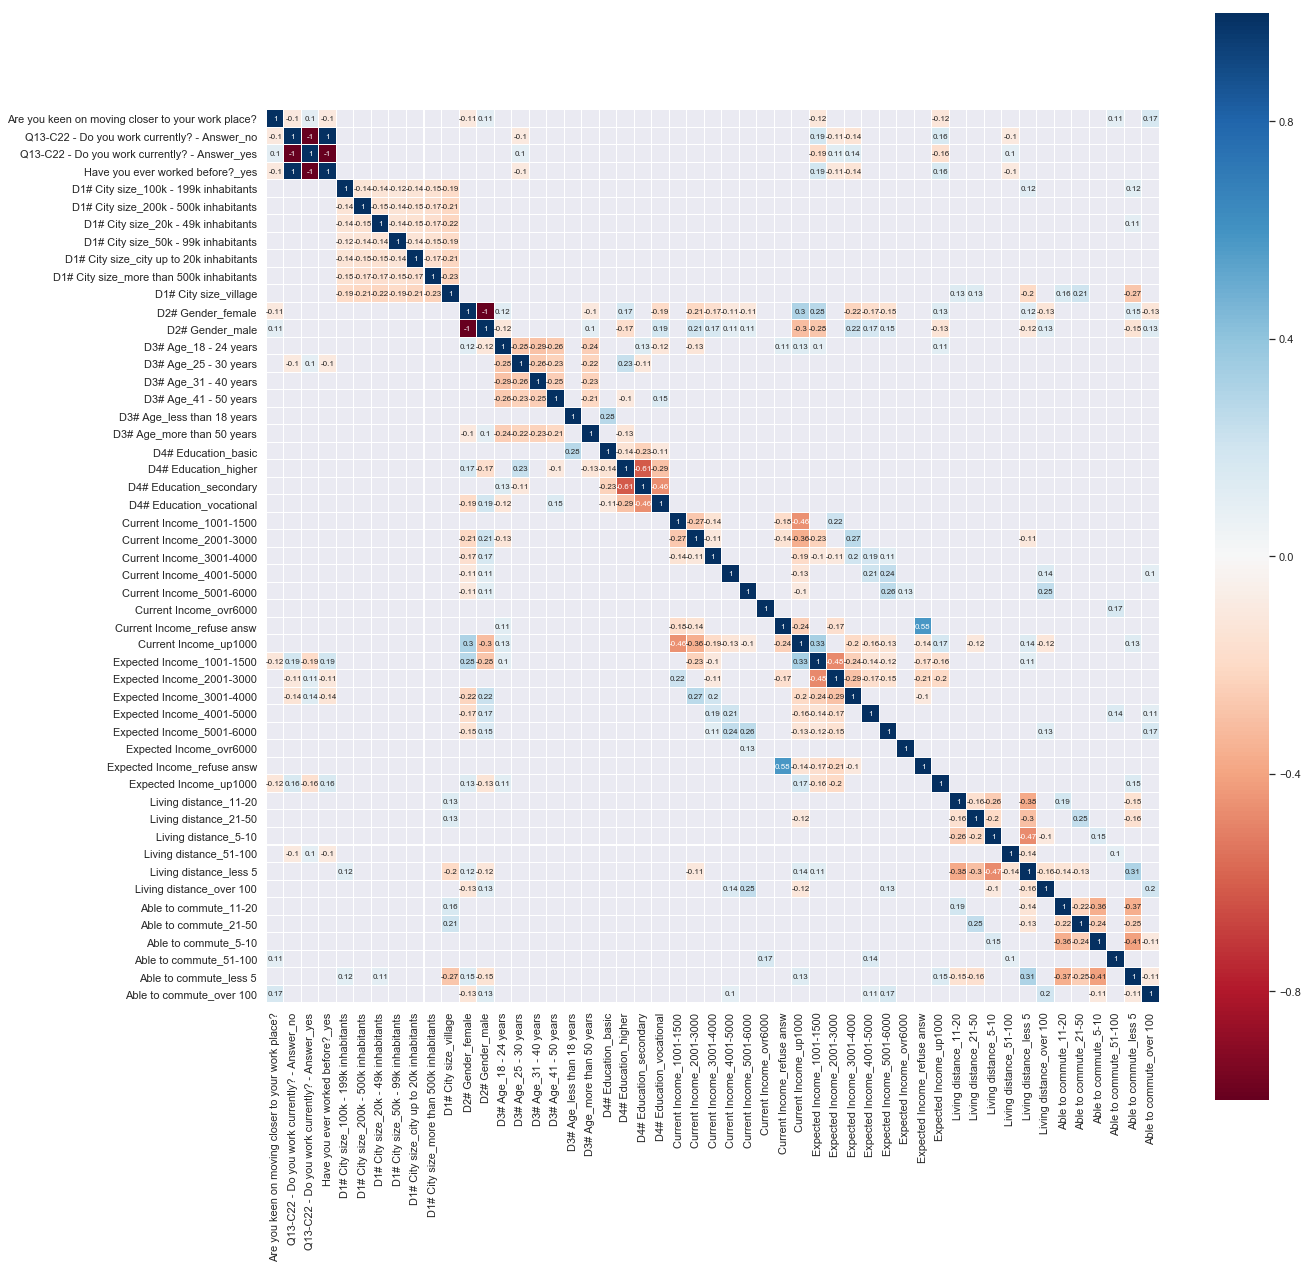

In [201]:
corr = df_adult_all_feature.drop('Are you looking for a job?_yes', axis=1).corr('pearson')

plt.figure(figsize=(20,20))
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], square=True, linewidths=0.01, annot_kws={"size": 8}, annot=True, cmap='RdBu');

In [202]:
corr[abs(corr) > 0.1]['Are you keen on moving closer to your work place?'].sort_values(ascending=False).head(10)

Are you keen on moving closer to your work place?    1.000000
Able to commute_over 100                             0.168537
D2# Gender_male                                      0.108548
Able to commute_51-100                               0.106478
Q13-C22 - Do you work currently? - Answer_yes        0.103091
Have you ever worked before?_yes                    -0.103091
Q13-C22 - Do you work currently? - Answer_no        -0.103091
D2# Gender_female                                   -0.108548
Expected Income_up1000                              -0.117828
Expected Income_1001-1500                           -0.121451
Name: Are you keen on moving closer to your work place?, dtype: float64

In [ ]:
# Checking results using stats library

for col in df_adult_all_feature.columns:
    if stats.pearsonr(df_adult_all_feature['Are you keen on moving closer to your work place?'],
                      df_adult_all_feature[col])[1] <= 0.05:
        print(stats.pearsonr(df_adult_all_feature['Are you keen on moving closer to your work place?'],
                                                                       df_adult_all_feature[col])[0],
             '  --- Pearsons coeff. for', col)

**Kruskal - Wallis test**

In [194]:
stats.kruskal(df_adult_all_num['Are you looking for a job?'],                      
df_adult_all_num['Q13-C22 - Do you work currently? - Answer'],         
df_adult_all_num['Have you ever worked before?'],                         
df_adult_all_num['Are you keen on moving closer to your work place?'],   
df_adult_all_num['D1# City size'],                                       
df_adult_all_num['D2# Gender'],                                           
df_adult_all_num['D3# Age'],                                             
df_adult_all_num['D4# Education'],                                       
df_adult_all_num['Current Income'],                                     
df_adult_all_num['Expected Income'],                                    
df_adult_all_num['Living distance'],                                     
df_adult_all_num['Able to commute'])              

KruskalResult(statistic=14983.912613145545, pvalue=0.0)

In [195]:
for col in df_adult_all_num.columns:
    print(stats.kruskal(df_adult_all_num['Are you keen on moving closer to your work place?'],
                  df_adult_all_num[col]), '----      ', col)

KruskalResult(statistic=2809.731357958616, pvalue=0.0) ----       id
KruskalResult(statistic=2017.602112676056, pvalue=0.0) ----       Are you looking for a job?
KruskalResult(statistic=68.31648668772958, pvalue=1.392518574387024e-16) ----       Q13-C22 - Do you work currently? - Answer
KruskalResult(statistic=361.0203337311525, pvalue=1.6881463235400634e-80) ----       Have you ever worked before?
KruskalResult(statistic=0.0, pvalue=1.0) ----       Are you keen on moving closer to your work place?
KruskalResult(statistic=2505.7100138927603, pvalue=0.0) ----       D1# City size
KruskalResult(statistic=164.79445256412328, pvalue=1.014405348354443e-37) ----       D2# Gender
KruskalResult(statistic=2815.976183795031, pvalue=0.0) ----       D3# Age
KruskalResult(statistic=2790.6784151155457, pvalue=0.0) ----       D4# Education
KruskalResult(statistic=2713.127974486636, pvalue=0.0) ----       Current Income
KruskalResult(statistic=2737.321640111841, pvalue=0.0) ----       Expected Income
K